# Practical example

## Importing the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [6]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

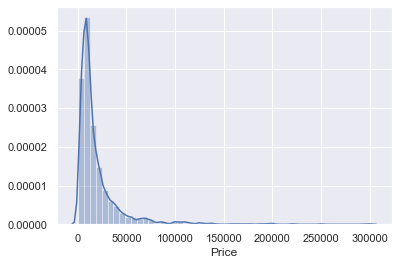

In [10]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [12]:
q = data_no_mv['Price'].quantile(0.98)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


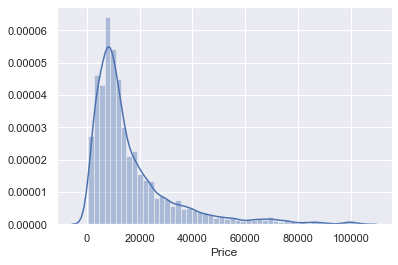

In [13]:
sns.distplot(data_1['Price'])

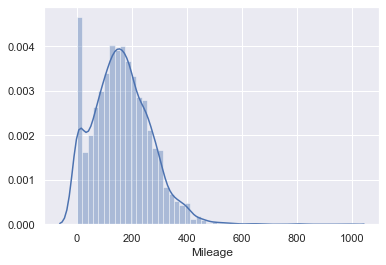

In [14]:
sns.distplot(data_no_mv['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.98)
data_2 = data_1[data_1['Mileage']<q]

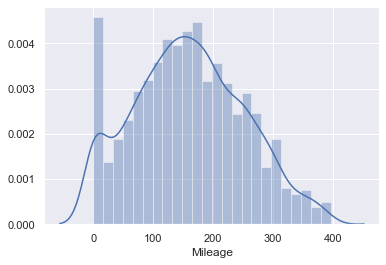

In [16]:
sns.distplot(data_2['Mileage'])

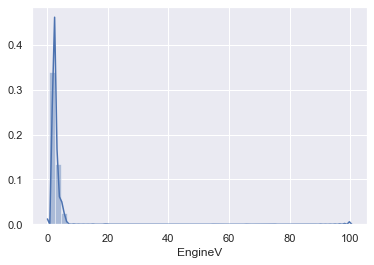

In [17]:
sns.distplot(data_no_mv['EngineV'])

In [18]:
data_3 = data_2[data_2['EngineV']<6.5]

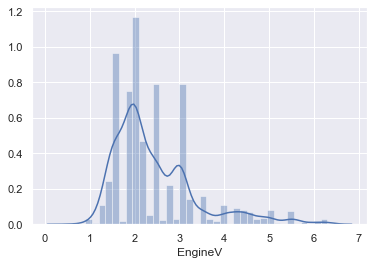

In [19]:
sns.distplot(data_3['EngineV'])

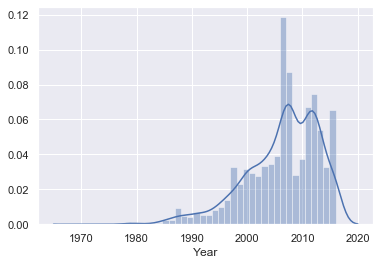

In [20]:
sns.distplot(data_no_mv['Year'])

In [103]:
q = data_3['Year'].quantile(0.03)
data_4 = data_3[data_3['Year']>q]

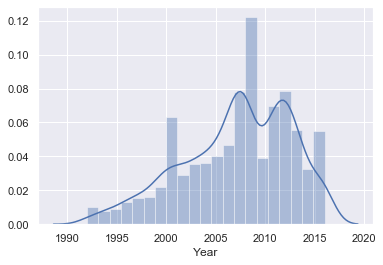

In [104]:
sns.distplot(data_4['Year'])

In [105]:
data_cleaned = data_4.reset_index(drop=True)

In [106]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3707,3707.00,3707,3707.00,3707.00,3707,3707,3707.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,821,nan,1379,nan,nan,1738,3353,nan
mean,NaN,17599.30,NaN,157.67,2.45,NaN,NaN,2007.09
std,NaN,16475.74,NaN,89.94,0.96,NaN,NaN,5.49
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1992.00
25%,NaN,7500.00,NaN,92.50,1.80,NaN,NaN,2003.00
50%,NaN,11900.00,NaN,156.00,2.20,NaN,NaN,2008.00
75%,NaN,21650.00,NaN,220.00,3.00,NaN,NaN,2012.00


## Checking the OLS assumptions

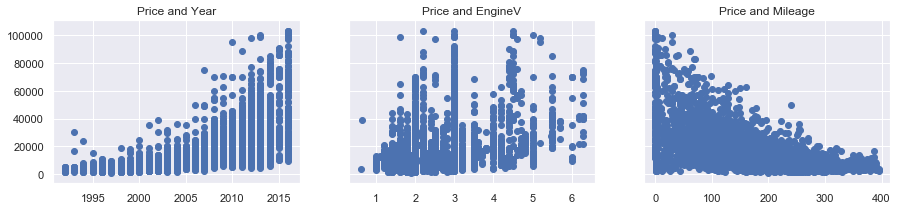

In [107]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

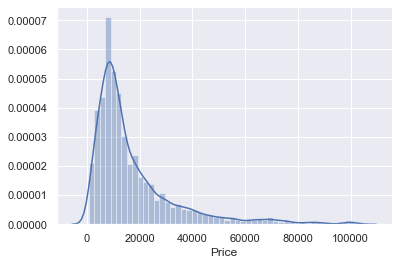

In [108]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [109]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
1,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
2,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
3,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
4,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3703,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3704,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3705,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


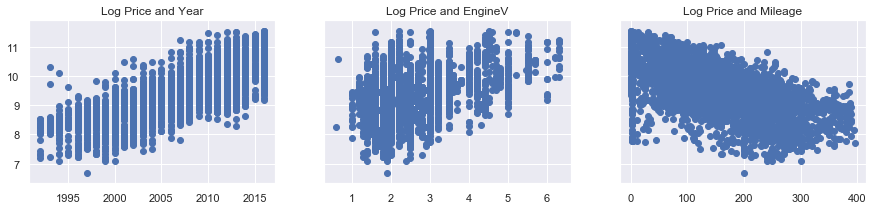

In [110]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [111]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [112]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [114]:
vif

,VIF,features
0,4.05,Mileage
1,10.32,Year
2,7.56,EngineV


In [115]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [116]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [117]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.50,9.29,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Rearrange a bit

In [118]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [119]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [120]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.29,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [153]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [157]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
y_hat = reg.predict(x_train)

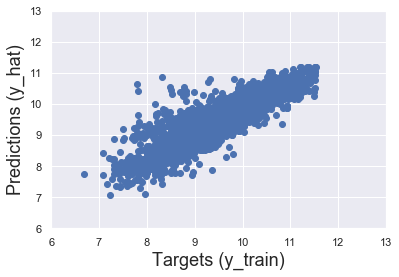

In [159]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

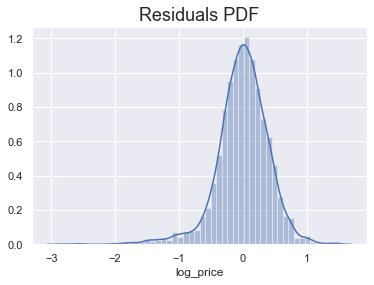

In [160]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [161]:
reg.score(x_train,y_train)

0.7591426042740778

### Finding the weights and bias

In [130]:
reg.intercept_

9.429000481851615

In [131]:
reg.coef_

array([-0.42227287,  0.20297096,  0.00882847, -0.01524287, -0.14459915,
       -0.19524069, -0.06724311, -0.10208748, -0.14790867, -0.09435026,
       -0.18624396, -0.12642592, -0.1632065 , -0.11718784, -0.02656248,
       -0.1291784 ,  0.32363636])

In [132]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.42
1,EngineV,0.20
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,-0.02
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.20
6,Brand_Toyota,-0.07
7,Brand_Volkswagen,-0.10
8,Body_hatch,-0.15
9,Body_other,-0.09


In [133]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

## Testing

In [134]:
y_hat_test = reg.predict(x_test)

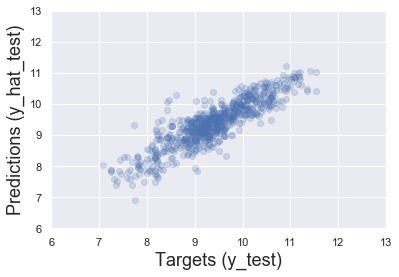

In [135]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [136]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,14441.63
1,12808.83
2,8107.40
3,7752.09
4,31317.62


In [137]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14441.63,nan
1,12808.83,nan
2,8107.40,nan
3,7752.09,nan
4,31317.62,nan
5,8523.49,1400.00
6,56247.60,nan
7,10177.91,nan
8,16060.43,9500.00
9,24457.75,nan


In [138]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.51
1    9.26
2    9.19
3    9.63
4   10.56
Name: log_price, dtype: float64

In [139]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14441.63,13500.00
1,12808.83,10500.00
2,8107.40,9750.00
3,7752.09,15200.00
4,31317.62,38700.00
5,8523.49,9350.00
6,56247.60,51500.00
7,10177.91,11800.00
8,16060.43,14300.00
9,24457.75,19500.00


In [140]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [141]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,14441.63,13500.00,-941.63,6.98
1,12808.83,10500.00,-2308.83,21.99
2,8107.40,9750.00,1642.60,16.85
3,7752.09,15200.00,7447.91,49.00
4,31317.62,38700.00,7382.38,19.08
5,8523.49,9350.00,826.51,8.84
6,56247.60,51500.00,-4747.60,9.22
7,10177.91,11800.00,1622.09,13.75
8,16060.43,14300.00,-1760.43,12.31
9,24457.75,19500.00,-4957.75,25.42


In [142]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,742.00,742.00,742.00,742.00
mean,15239.95,16655.32,1415.38,32.78
std,11314.03,15015.09,7844.95,41.15
min,981.28,1200.00,-23683.63,0.09
25%,7657.64,7525.00,-2210.50,11.92
50%,12145.89,11725.00,170.04,23.80
75%,19332.90,20900.00,3214.54,40.08
max,75468.69,103333.00,69574.49,430.61


In [143]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
173,28672.98,28700.00,27.02,0.09
738,12040.79,12000.00,-40.79,0.34
382,21647.53,21500.00,-147.53,0.69
690,24358.58,24171.42,-187.16,0.77
621,5042.35,4999.00,-43.35,0.87
414,25116.53,24900.00,-216.53,0.87
734,21303.87,21500.00,196.13,0.91
713,12372.18,12499.00,126.82,1.01
165,28685.59,28350.00,-335.59,1.18
69,6376.68,6300.00,-76.68,1.22
